# III. Question

## Nội dung



### Trong đại dịch cuối năm 2019 -2022, giá cổ phiếu và tỷ suất lợi nhuận cổ phần (EPS) thay đổi liên tục hãy cho biết những công ty mà nhà đầu tư sẵn sàng trả giá cao cho một cổ phiếu trên thị trường chứng khoán ?

## Mục đích:

 Mục đích của việc này là để cung cấp thông tin về những công ty mà nhà đầu tư sẵn sàng trả giá cao cho một cổ phiếu trên thị trường chứng khoán trên thế giới trong đại dịch cuối năm 2019 -2022. Thông tin này có thể giúp nhà đầu tư đưa ra quyết định đầu tư sáng suốt.

Cụ thể, mục đích của việc này bao gồm:

- Giúp nhà đầu tư hiểu rõ hơn về những yếu tố ảnh hưởng đến giá cổ phiếu.

- Cung cấp thông tin về những công ty có khả năng tăng trưởng giá cổ phiếu trong dài hạn.

- Giúp nhà đầu tư đưa ra quyết định đầu tư phù hợp với nhu cầu và mục tiêu của bản thân.

## Import các thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import re

## Load dataset đã được tạo

In [3]:
data = pd.read_csv("../data/preprocessed/cleaned_dataset.csv")

Cách thực hiện:

1. Đầu tiên lọc ra dữ liệu từ năm 2020 đến năm 2022.

In [4]:
data_20_22 = data[(data['Year'] >= 2020) & (data['Year'] <= 2022)]
data_20_22

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories
1,Apple,2022,5.92,113.96000,387.53,2066.00,120.06,50.67,352.75,48.30,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
2,Apple,2021,6.08,116.90000,378.32,2901.00,124.71,63.09,351.00,62.63,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
3,Apple,2020,3.74,74.25000,294.13,2255.00,112.43,65.33,323.88,90.94,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
24,Microsoft,2022,9.02,82.58000,204.09,1787.00,61.27,166.54,364.84,104.75,USA,374.23,"Software, Tech, Video games, Dow jones, AI"
25,Microsoft,2021,9.47,79.68000,184.90,2522.00,67.77,141.98,333.77,130.33,USA,374.23,"Software, Tech, Video games, Dow jones, AI"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41402,KBR,2021,0.19,0.22000,7.33,6.68,2.08,1.70,6.19,0.37,USA,52.24,Engineering
41403,KBR,2020,-0.52,0.05800,5.76,4.40,1.82,1.60,5.70,0.43,USA,52.24,Engineering
41424,VF Corporation,2022,1.07,0.43000,11.69,10.72,6.44,3.53,13.34,1.27,USA,18.14,"Clothing, Footwear"
41425,VF Corporation,2021,3.57,1.44000,11.59,28.75,6.95,3.05,13.75,1.41,USA,18.14,"Clothing, Footwear"


2. Tính chỉ số P/E cho mỗi công ty trong từng năm với công thức:

`P/E = Giá thị trường của cổ phiếu (Price)/Thu nhập trên một cổ phiếu (EPS)`

Chỉ số P/E (tỷ lệ giá trên thu nhập) là một chỉ số quan trọng trong phân tích chứng khoán. Nó đo lường mức giá mà nhà đầu tư sẵn sàng trả cho một đồng lợi nhuận từ một cổ phiếu. P/E thường được sử dụng để so sánh giá trị của các công ty trong cùng ngành. Nếu P/E của một công ty thấp hơn so với các công ty cùng ngành, điều này có thể cho thấy rằng công ty đó đang được định giá thấp hơn so với giá trị thực của nó. Ngược lại, nếu P/E của một công ty cao hơn so với các công ty cùng ngành, điều này có thể cho thấy rằng công ty đó đang được định giá cao hơn so với giá trị thực của nó.



In [5]:
PE_ratio = data_20_22
PE_ratio['PE_ratio'] = data_20_22['Share price ($)']/data_20_22['EPS ($)']
PE_ratio.sort_values(by=['PE_ratio'], ascending=False).head(10)

C:\Users\duypr\AppData\Local\Temp\ipykernel_14324\2083729202.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  PE_ratio['PE_ratio'] = data_20_22['Share price ($)']/data_20_22['EPS ($)']


,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories,PE_ratio
40873,Tokyu,2021,0.001234,0.15000,8.08,8.02,10.71000,6.82,22.44,0.41,Japan,12.04,"Railways, Transportation",9756.888169
40322,Alibaba Health Information Technology,2020,0.000070,0.00128,1.35,39.39,0.00982,0.73,1.10,0.42,Hong Kong,0.54,"ECommerce, Retail, Internet, Tech, Drugstore",7691.212078
19208,KE Holdings,2020,0.003036,0.49000,10.33,72.54,1.22000,10.24,15.99,8.68,China,15.10,Real estate,4973.649539
30639,Xero,2020,0.014250,0.00591,0.43,16.12,0.29000,0.25,0.69,0.32,New Zealand,69.09,"Software, Tech",4848.421053
5753,SABIC,2020,0.005440,1.32000,31.36,81.16,12.27000,51.82,78.83,10.23,Saudi Arabia,21.35,Chemicals,3924.632353
13090,Adani Green Energy,2020,0.005311,0.01872,0.38,22.50,1.97000,0.30,2.44,0.11,India,18.60,"Electricity, Renewable energy, Energy",3502.165317
25370,Insulet,2022,0.070000,0.03650,1.30,20.44,1.40000,0.47,2.25,0.67,USA,194.66,Medical devices,2780.857143
4717,Workday,2021,0.110000,0.03921,4.89,68.29,2.23000,3.27,8.71,3.53,USA,273.41,"Software, Tech",2485.545455
2602,Booking Holdings (Booking.com),2020,1.510000,0.56000,6.79,91.21,12.38000,4.89,21.87,11.06,USA,3275.00,"Internet, Tech, Travel, Online Travel",2168.874172
28430,Galp Energia,2021,0.007000,0.97000,18.71,8.00,6.20000,4.49,16.88,3.32,Portugal,14.36,"OilGas, Energy",2051.428571


Tính trung bình chỉ số P/E cho mỗi công ty trong 3 năm đại dịch covid 19:

In [6]:
PE_ratio_mean = PE_ratio[['Company', 'PE_ratio']].groupby(['Company']).mean().sort_values(by=['PE_ratio'], ascending=False)
PE_ratio_mean[['PE_ratio']].head(10)

,PE_ratio
Company,
Alibaba Health Information Technology,2529.194105
Insulet,1798.947111
Adani Green Energy,1620.989679
KE Holdings,1556.718743
SABIC,1316.523599
Xero,1301.657354
Booking Holdings (Booking.com),775.407603
ServiceNow,719.754614
Workday,692.595465


Chúng ta lấy ra top 5 công ty có chỉ số P/E cao nhất:

<AxesSubplot:title={'center':'Top 5 PE Ratio'}, xlabel='Company'>

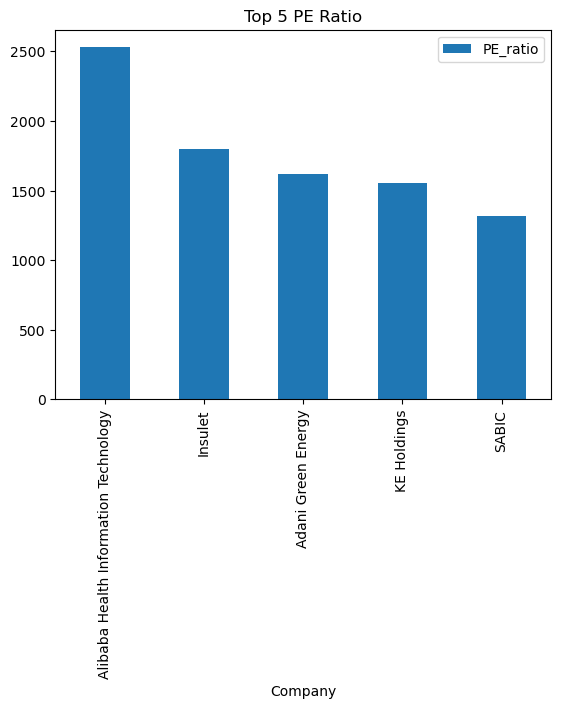

In [8]:
top_5_PE_ratio = PE_ratio_mean.head(5)
top_5_PE_ratio[['Company', 'PE_ratio']].plot.bar(x='Company', y='PE_ratio', rot=90, title='Top 5 PE Ratio')

Như vậy ta có thể thấy được 5 công ty có chỉ số P/E cao nhất gồm: 
- Alibaba Health Information Technology

- Insulet

- Adani Green Energy

- KE Holdings

- SABIC


##### Ta sẽ phân tích 5 công ty có chỉ số P/E cao nhất:

Đầu tiên, ta cần biết những công ty này hoạt động trong những ngành nghề nào?

In [9]:
top_5_PE_ratio[['Company', 'Categories']]

,Company,Categories
0,Alibaba Health Information Technology,"ECommerce, Retail, Internet, Tech, Drugstore"
1,Insulet,Medical devices
2,Adani Green Energy,"Electricity, Renewable energy, Energy"
3,KE Holdings,Real estate
4,SABIC,Chemicals


Dễ dàng ta thấy được, 5 công ty này hoạt động trong các lĩnh vực như:

- Điện lực, năng lượng.

- Y tế

- Bất động sản

- Thương mại điện tử

- Công nghệ và Internet

Ta có thể lý giải được tại sao các ngành nghề ngày lại được các nhà đầu tư đánh giá cao trong thời kỳ dịch bệnh.

- Điện lực, năng lượng: Dịch COVID-19 đã dẫn đến sự gia tăng nhu cầu sử dụng điện năng do nhiều người phải ở nhà làm việc và học tập từ xa. Ngoài ra, các biện pháp giãn cách xã hội cũng khiến nhu cầu sử dụng điện cho các hoạt động giải trí tại nhà tăng lên.

- Y tế: Dịch COVID-19 đã khiến nhu cầu về các dịch vụ y tế tăng cao, bao gồm xét nghiệm, điều trị, tiêm chủng,... Điều này đã tạo ra cơ hội cho các doanh nghiệp trong ngành y tế phát triển.

- Bất động sản: Dịch COVID-19 đã khiến nhiều người có xu hướng mua nhà để ở thay vì đi thuê. Ngoài ra, lãi suất ngân hàng thấp cũng đã thúc đẩy nhu cầu mua nhà và sự khó khăn của việc kinh doanh trong thời kì dịch bệnh cũng thúc đẩy lượng lớn người chọn bất động sản làm con đường đầu tư an toàn.

- Thương mại điện tử: Dịch COVID-19 đã khiến nhiều người phải hạn chế ra ngoài, dẫn đến sự gia tăng nhu cầu mua sắm trực tuyến. Điều này đã tạo ra cơ hội cho các doanh nghiệp thương mại điện tử phát triển.

- Công nghệ và Internet: Dịch COVID-19 đã khiến nhiều người phải làm việc và học tập từ xa, dẫn đến sự gia tăng nhu cầu sử dụng các dịch vụ công nghệ và Internet. Điều này đã tạo ra cơ hội cho các doanh nghiệp trong lĩnh vực công nghệ và Internet phát triển.


Thật vậy, những công ty thuộc những ngành này đều được các nhà đầu tư đánh giá cao. Ta sẽ chững minh điều này.

Ta sẽ lọc ra những công ty có cùng ngành với những công ty này

Các công ty thương mại điện tử và bán lẻ:

In [10]:
ECommerce_companies = PE_ratio_mean[(PE_ratio_mean['Categories'].str.contains('ECommerce')) | (PE_ratio_mean['Categories'].str.contains('Retail')) | (PE_ratio_mean['Categories'].str.contains('Consumer'))]
ECommerce_companies

,Company,PE_ratio,Categories
0,Alibaba Health Information Technology,2529.194105,"ECommerce, Retail, Internet, Tech, Drugstore"
35,Chewy,199.896641,"ECommerce, Internet, Tech"
39,DMart,170.093907,Retail
68,JD Health,121.520424,"ECommerce, Healthcare, Internet, Tech, Drugstore"
75,Trent Limited,114.614940,Retail
...,...,...,...
1349,MatsukiyoCocokara,9.183246,"Retail, Drugstore"
1351,Lithia Motors,9.132182,"Retail, Car retail"
1419,Pinduoduo,6.784257,"ECommerce, Internet, Tech"
1466,Scentre Group,4.762626,Retail


Các công ty điện lực và năng lượng:

In [11]:
Internet_companies = PE_ratio_mean[(PE_ratio_mean['Categories'].str.contains('Internet')) | (PE_ratio_mean['Categories'].str.contains('Tech'))]
Internet_companies

,Company,PE_ratio,Categories
0,Alibaba Health Information Technology,2529.194105,"ECommerce, Retail, Internet, Tech, Drugstore"
5,Xero,1301.657354,"Software, Tech"
6,Booking Holdings (Booking.com),775.407603,"Internet, Tech, Travel, Online Travel"
7,ServiceNow,719.754614,"Software, Internet, Tech"
8,Workday,692.595465,"Software, Tech"
...,...,...,...
1419,Pinduoduo,6.784257,"ECommerce, Internet, Tech"
1428,Rohm,6.432157,"Semiconductors, Tech"
1517,Nokia,2.442647,Tech
1530,Dropbox,1.786207,"Software, Tech"


Các công ty bất động sản

In [12]:
Real_estate_companies = PE_ratio_mean[PE_ratio_mean['Categories'].str.contains('Real estate')]
Real_estate_companies

,Company,PE_ratio,Categories
3,KE Holdings,1556.718743,Real estate
14,SBA Communications,426.323222,"Real estate, Investment, Telecommunication, RE..."
48,Equinix,145.767474,"Real estate, Investment, Internet, Tech, REITs"
50,Welltower,141.252010,Real estate
55,Choice Properties REIT,134.304829,"Real estate, Investment, REITs"
...,...,...,...
1441,Deutsche Wohnen,5.880043,Real estate
1469,Hongkong Land,4.636641,"Real estate, Investment"
1473,Wharf REIC,4.487374,"Real estate, Investment"
1506,Longfor Group,3.006108,Real estate


Các công ty y tế, công nghệ sinh học

In [13]:
Medical_companies = PE_ratio_mean[(PE_ratio_mean['Categories'].str.contains('Medical')) | (PE_ratio_mean['Categories'].str.contains('Chemicals') | (PE_ratio_mean['Categories'].str.contains('Bio')))]
Medical_companies

,Company,PE_ratio,Categories
1,Insulet,1798.947111,Medical devices
4,SABIC,1316.523599,Chemicals
18,POSCO Chemical,336.238542,Chemicals
23,Gilead Sciences,275.898324,"Pharmaceuticals, Biotech"
24,BioNTech,231.381538,"Pharmaceuticals, Biotech, mRNA therapeutics"
...,...,...,...
1421,Bristol-Myers Squibb,6.725238,"Pharmaceuticals, Biotech"
1434,Teva Pharmaceutical Industries,6.170743,"Pharmaceuticals, Biotech"
1501,Mitsubishi Chemical Holdings,3.125380,Chemicals
1507,Incyte,2.972515,"Pharmaceuticals, Biotech"


Các công ty điện lực, năng lượng

In [14]:
Electricity_companies = PE_ratio_mean[(PE_ratio_mean['Categories'].str.contains('Electricity') | (PE_ratio_mean['Categories'].str.contains('Energy')))]
Electricity_companies

,Company,PE_ratio,Categories
2,Adani Green Energy,1620.989679,"Electricity, Renewable energy, Energy"
9,Galp Energia,680.846349,"OilGas, Energy"
10,TechnipFMC,602.388327,"OilGas, Energy"
25,Adani Total Gas,228.421368,"OilGas, Utility companies, Energy"
37,Barito Pacific,188.320881,"OilGas, Chemicals, Energy"
...,...,...,...
1540,ENEOS Holdings,1.212370,"OilGas, Energy"
1541,Uniper,1.104425,"Electricity, Energy"
1542,Vistra,1.017839,"Electricity, Energy"
1543,Korea Electric Power,0.951282,"Electricity, Energy"


Các ngành khác

In [15]:
orther_companies = PE_ratio_mean[(~PE_ratio_mean['Company'].isin(top_5_PE_ratio['Company'])) & (~PE_ratio_mean['Company'].isin(ECommerce_companies['Company'])) & (~PE_ratio_mean['Company'].isin(Internet_companies['Company'])) & (~PE_ratio_mean['Company'].isin(Real_estate_companies['Company'])) & (~PE_ratio_mean['Company'].isin(Medical_companies['Company'])) & (~PE_ratio_mean['Company'].isin(Electricity_companies['Company']))]
orther_companies

,Company,PE_ratio,Categories
11,Wise PLC,512.845573,Financial services
12,Celsius Holdings,474.246395,Beverages
19,Ooredoo Q.P.S.C.,327.033965,Telecommunication
20,EssilorLuxottica,326.968194,"Luxury goods, Glasses and contact lenses, CAC 40"
21,Adani Enterprises,301.079380,Conglomerate
...,...,...,...
1548,American International Group,0.571404,Insurance
1550,Bank of Ireland Group,0.234930,"Banks, Financial services"
1551,Severstal,0.161779,"Mining, Steel producers, Steel industry"
1552,U.S. Steel,0.129380,"Steel producers, Steel industry"


Tính P/E trung bình của mỗi nhóm ngành trêm và những ngành còn lại để chúng ta có thể so sánh.

In [43]:
all_companies_mean = pd.DataFrame({'Company': ['ECommerce', 'Internet', 'Real estate', 'Medical', 'Electricity', 'Other'], 'PE_ratio': [ECommerce_companies['PE_ratio'].mean(), Internet_companies['PE_ratio'].mean(), Real_estate_companies['PE_ratio'].mean(), Medical_companies['PE_ratio'].mean(), Electricity_companies['PE_ratio'].mean(), orther_companies['PE_ratio'].mean()]})
all_companies_mean

,Company,PE_ratio
0,ECommerce,65.000536
1,Internet,93.160277
2,Real estate,62.843264
3,Medical,63.601246
4,Electricity,45.358140
5,Other,30.193080


#### Trực quan hoá:

Text(0.5, 1.0, 'P/E Ratio by each category of Companies')

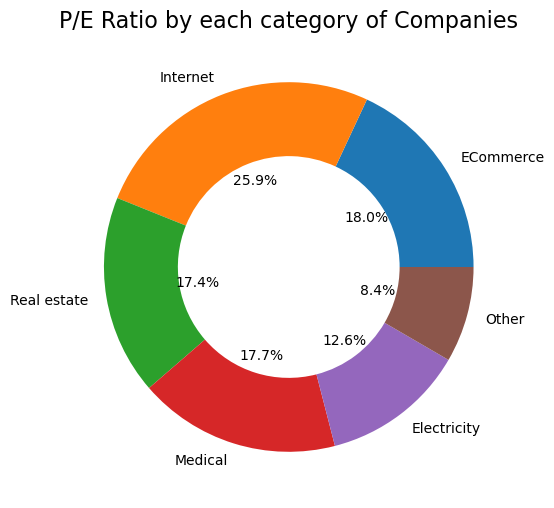

In [74]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw=dict(aspect="equal"))

fig = ax.pie(all_companies_mean['PE_ratio'], wedgeprops=dict(width=0.4), startangle= 0, autopct='%1.1f%%', labels=all_companies_mean['Company'], pctdistance=0.5, labeldistance=1.1)
ax.set_title("P/E Ratio by each category of Companies", fontsize=16)

Từ biểu đồ tròn trên ta có thể thấy điều chúng ta khẳng định là đúng, các công ty liên quan với các ngành này điều được các nhà đầu tư đánh giá cao. Từ đó ta có thể suy ra các công ty này có khả năng phục hồi kinh tế sau đại dịch nhất.

## Kết luận

Trong đại dịch covid từ cuối năm 2019 đến năm 2022, giá cổ phiếu và tỷ suất lợi nhuận cổ phần (EPS) của các công ty đã có sự thay đổi liên tục. Theo đó, có một số công ty mà nhà đầu tư sẵn sàng trả giá cao cho một cổ phiếu trên thị trường chứng khoán.

Dựa trên kết quả phân tích, có thể thấy rằng các công ty có EPS cao, tăng trưởng EPS ổn định và có tiềm năng tăng trưởng trong tương lai là những công ty được nhà đầu tư ưa chuộng. Cụ thể, các công ty này có thể kể đến như:

- Ngành thương mại điện tử, công nghệ: Alibaba Health Information Technology

- Ngành bất động sản: KE Holdings

- Ngành y tế, y dược: SABIC, Insulet

- Ngành năng lượng: Adani Green Energy

Ngoài ra, các công ty thuộc các lĩnh vực như những công ty này đều được nhà đầu tư đánh giá cao.